In [1]:
import pandas as pd   
import numpy as np   
import matplotlib.pyplot as plt   
import seaborn as sns    

In [2]:
data = pd.read_csv('../dataset/fraud_dataset.csv')
# data=pd.DataFrame(data)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.shape 

(6362620, 11)

* <font color='DarkOrange'>step</font> : represents a unit of time where 1 step equals 1 hour
* <font color='Pink'>type</font> : type of online transaction
* <font color='Orange'>amount</font> : the amount of the transaction
* <font color='Yellow'>nameOrig</font> : customer starting the transaction
* <font color='Purple'>oldbalanceOrg</font> : balance before the transaction
* <font color='Green'>newbalanceOrig</font> : balance after the transaction
* <font color='Brown'>nameDest</font> : recipient of the transaction
* <font color='Tomato'>oldbalanceDest</font> : initial balance of recipient before the transaction
* <font color='DarkKhaki'>newbalanceDest</font> : the new balance of recipient after the transaction
* <font color='red'>isFraud</font> : fraud transaction

In [6]:
numeric_df = data.select_dtypes(include=[np.number])

infinite_columns = numeric_df.columns.to_series()[np.isinf(numeric_df).any()]
if not infinite_columns.empty:
    print("Columns with infinite values:", infinite_columns.index.tolist())
else:
    print("No columns with infinite values.")


nan_columns = numeric_df.columns[numeric_df.isna().any()].tolist()
if nan_columns:
    print("Columns with NaN values:", nan_columns)
else:
    print("No columns with NaN values.")

No columns with infinite values.
No columns with NaN values.


In [7]:
print(data.isnull().sum()) 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [9]:
# Exploring transaction type
print(data.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [10]:
import plotly.express as px
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

figure = px.pie(data,
                values=quantity,
                names=transactions, hole=0.5,
                title="Distribution of Transaction Type")
figure.show()

In [11]:
import plotly.express as px

# Bar Graph with color
figure_bar = px.bar(
    data_frame=data,
    x=transactions,
    y=quantity,
    color=transactions,  # Use transaction type for color differentiation
    title="Distribution of Transaction Type",
    labels={'x': 'Transaction Type', 'y': 'Quantity'}
)

figure_bar.show()



## this is the type of trasction that are most susceptible to fraud (isFraud)?

C:\Users\hp\AppData\Local\Temp\ipykernel_3108\3029146667.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




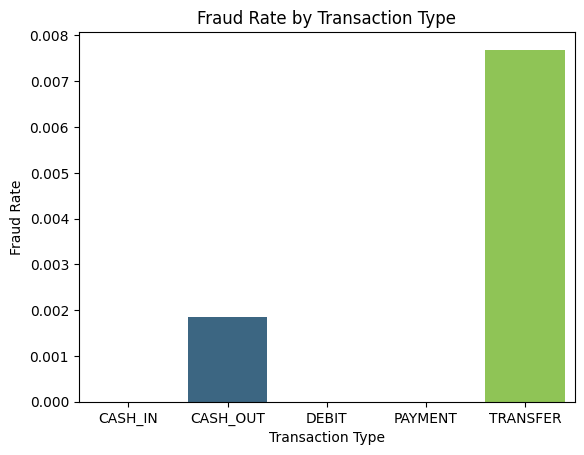

In [12]:
# # Use a different seaborn palette
fraud_by_type = data.groupby('type')['isFraud'].mean()
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values, palette="viridis")
plt.title("Fraud Rate by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate")
plt.show()


In [ ]:
# plt.figure(figsize=(12, 6))
# fraud_per_day.plot(kind='line', color='crimson', linewidth=2, marker='o', markersize=6)
# plt.title("Number of Fraudulent Transactions Per Day", fontsize=14)
# plt.xlabel("Day", fontsize=12)
# plt.ylabel("Number of Fraudulent Transactions", fontsize=12)
# plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
# plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_3108\1920009002.py:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\hp\AppData\Local\Temp\ipykernel_3108\1920009002.py:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




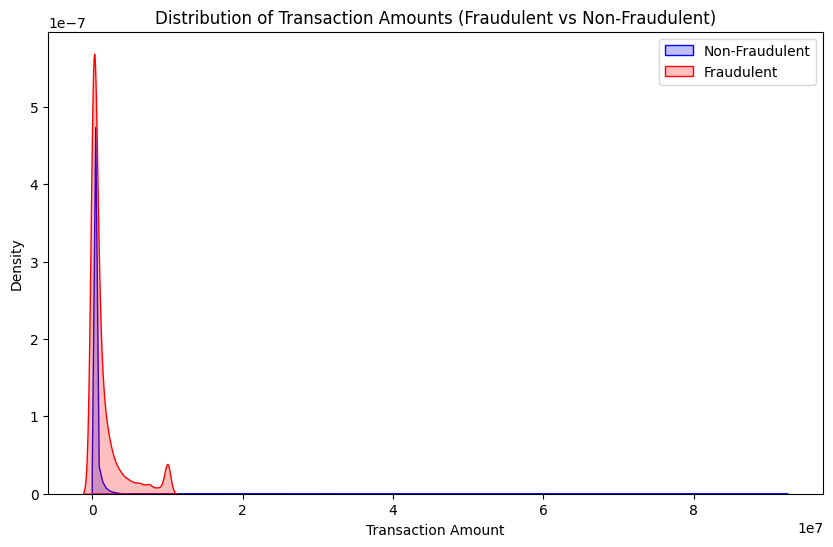

In [13]:
# plt.figure(figsize=(10, 6))
# sns.violinplot(x='isFraud', y='amount', data=data, palette={0: "blue", 1: "red"})
# plt.title("Transaction Amounts (Fraudulent vs Non-Fraudulent)")
# plt.xlabel("Fraud Status (0 = Non-Fraudulent, 1 = Fraudulent)")
# plt.ylabel("Transaction Amount")
# plt.show()


plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['isFraud'] == 0]['amount'], label="Non-Fraudulent", shade=True, color="blue")
sns.kdeplot(data[data['isFraud'] == 1]['amount'], label="Fraudulent", shade=True, color="red")
plt.title("Distribution of Transaction Amounts (Fraudulent vs Non-Fraudulent)")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.legend()
plt.show()

In [14]:
numeric_data = data.select_dtypes(include=[np.number])

numeric_data = numeric_data.fillna(0)

correlation = numeric_data.corr()

print(correlation)

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   
isFlaggedFraud  0.003277  0.012295       0.003835        0.003776   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.027665        0.025888  0.031578        0.003277  
amount                0.294137        0.459304  0.076688        0.012295  
oldbalanceOrg         0.066243        0.042029  0.010154        0.003835  
newbalanceOrig        0.067812        0.041837 -0.008148        0.003776  
old

In [ ]:
# Print correlation of 'isFraud' with other features if it exists
if 'isFraud' in correlation.columns:
    print(correlation["isFraud"].sort_values(ascending=False))
else:
    print("'isFraud' column not found in numeric data.")

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True,cmap="YlGnBu")
plt.show()

In [ ]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

In [ ]:
# Preprocessing the data

x = pd.DataFrame(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = pd.DataFrame(data[["isFraud"]])


## Decision Tree Classifier Applied

In [ ]:
# training a machine learning model
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
x['type'] = label_encoder.fit_transform(x['type'])  # Convert 'type' to numeric values

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)

# Train a Decision Tree model
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

# Print accuracy score of the model
# print(xtrain.shape)
print("Model Accuracy:", model.score(xtest, ytest))




In [ ]:
# # Calculate accuracy scores
# train_accuracy = model.score(xtrain, ytrain)
# test_accuracy = model.score(xtest, ytest)

# # Print accuracy scores
# print(f"Model Accuracy on Training Data: {train_accuracy:.2f}")
# print(f"Model Accuracy on Test Data: {test_accuracy:.2f}")

# # Plotting accuracy comparison
# labels = ['Training Accuracy', 'Test Accuracy']
# accuracy = [train_accuracy, test_accuracy]

# plt.figure(figsize=(8, 5))  # Adjust figure size for better clarity
# plt.bar(labels, accuracy, color=['blue', 'orange'], alpha=0.7, edgecolor='black')
# plt.ylabel('Accuracy')
# plt.xlabel('Data Type')
# plt.title('Model Accuracy Comparison')
# plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()


In [ ]:
# from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import LabelEncoder

# # Convert 'Fraud' and 'No Fraud' to numerical values
# label_encoder = LabelEncoder()
# ytest_encoded = label_encoder.fit_transform(ytest)

# # Compute ROC curve
# fpr, tpr, thresholds = roc_curve(ytest_encoded, model.predict_proba(xtest)[:, 1])

# # Compute AUC (Area Under the Curve)
# roc_auc = auc(fpr, tpr)
# print(roc_auc)

# # Plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='lower right')
# plt.show()


In [ ]:
# from sklearn.metrics import precision_recall_curve
# from sklearn.preprocessing import LabelEncoder
# import matplotlib.pyplot as plt

# # Convert 'Fraud' and 'No Fraud' to numerical values
# label_encoder = LabelEncoder()
# ytest_encoded = label_encoder.fit_transform(ytest)

# # Compute precision-recall curve
# precision, recall, _ = precision_recall_curve(ytest_encoded, model.predict_proba(xtest)[:, 1])

# # Plot Precision-Recall curve
# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, color='blue', label='Precision-Recall curve')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend(loc='lower left')
# plt.show()


In [ ]:
importances = model.feature_importances_
feature_names = x.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances, color='Blue')
plt.ylabel('Feature ') 
plt.xlabel('Importance Fetaures')         
plt.title('Feature Importance')
plt.xticks(rotation=45)         
plt.show()


## Converting the model to pickle File for Frontant  use


In [ ]:

import pickle
# Save the model
pickle.dump(model, open("model.pkl", "wb"))


In [ ]:
# loading the model                             
model = pickle.load(open("model.pkl", "rb"))


## validaing  the model is predicting correct or not by giving example

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict([[4, 181.00, 181.0, 0]])
print(y_pred)

## Applied Model 2.Random Forest Classifier

In [ ]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef

# Label encoding for 'type' column if needed
label_encoder = LabelEncoder()
x['type'] = label_encoder.fit_transform(x['type'])  # Convert 'type' to numeric values

# Encode target variable y into numeric values
y_encoded = label_encoder.fit_transform(y)  # 'Fraud' -> 1, 'No Fraud' -> 0

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y_encoded, test_size=0.20, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_rf = rf_model.predict(xtest)

# Calculate metrics
accuracy_rf = accuracy_score(ytest, y_pred_rf)
f1_rf = f1_score(ytest, y_pred_rf, pos_label=1)
precision_rf = precision_score(ytest, y_pred_rf, pos_label=1)
recall_rf = recall_score(ytest, y_pred_rf, pos_label=1)
mcc_rf = matthews_corrcoef(ytest, y_pred_rf)

# Print the metrics
print("\nRandom Forest Metrics:")
print("Model Accuracy:", accuracy_rf)
print("Classification Accuracy (CA):", accuracy_rf)  # Classification Accuracy (same as Model Accuracy)
print("F1 Score:", f1_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("Matthews Correlation Coefficient (MCC):", mcc_rf)


## Modele 2: K-Neasest Neighbours 

In [ ]:
# Import required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef

# Label encoding for 'type' column if needed
label_encoder = LabelEncoder()
x['type'] = label_encoder.fit_transform(x['type'])  # Convert 'type' to numeric values

# Encode target variable y into numeric values
y_encoded = label_encoder.fit_transform(y)  # 'Fraud' -> 1, 'No Fraud' -> 0

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y_encoded, test_size=0.20, random_state=42)

# Initialize K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_knn = knn_model.predict(xtest)

# Calculate metrics
accuracy_knn = accuracy_score(ytest, y_pred_knn)
f1_knn = f1_score(ytest, y_pred_knn, pos_label=1)
precision_knn = precision_score(ytest, y_pred_knn, pos_label=1)
recall_knn = recall_score(ytest, y_pred_knn, pos_label=1)
mcc_knn = matthews_corrcoef(ytest, y_pred_knn)

# Print the metrics
print("\nK-Nearest Neighbors (KNN) Metrics:")
print("Model Accuracy:", accuracy_knn)
print("Classification Accuracy (CA):", accuracy_knn)  # Classification Accuracy (same as Model Accuracy)
print("F1 Score:", f1_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("Matthews Correlation Coefficient (MCC):", mcc_knn)


##  Model 3: Logistic Regression 

In [ ]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef

# Label encoding for 'type' column if needed
label_encoder = LabelEncoder()
x['type'] = label_encoder.fit_transform(x['type'])  # Convert 'type' to numeric values

# Encode target variable y into numeric values
y_encoded = label_encoder.fit_transform(y)  # 'Fraud' -> 1, 'No Fraud' -> 0

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y_encoded, test_size=0.20, random_state=42)

# Initialize Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = log_reg_model.predict(xtest)

# Calculate metrics
accuracy = accuracy_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred, pos_label=1)
precision = precision_score(ytest, y_pred, pos_label=1)
recall = recall_score(ytest, y_pred, pos_label=1)
mcc = matthews_corrcoef(ytest, y_pred)

# Print the metrics
print("Model Accuracy:", accuracy)
print("Classification Accuracy (CA):", accuracy)  # Classification Accuracy (same as Model Accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Matthews Correlation Coefficient (MCC):", mcc)


## Model 4: Gradient Boosting Classifier

In [ ]:
# Import required libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef

# Label encoding for 'type' column if needed
label_encoder = LabelEncoder()
x['type'] = label_encoder.fit_transform(x['type'])  # Convert 'type' to numeric values

# Encode target variable y into numeric values
y_encoded = label_encoder.fit_transform(y)  # 'Fraud' -> 1, 'No Fraud' -> 0

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y_encoded, test_size=0.20, random_state=42)

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_gb = gb_model.predict(xtest)

# Calculate metrics
accuracy_gb = accuracy_score(ytest, y_pred_gb)
f1_gb = f1_score(ytest, y_pred_gb, pos_label=1)
precision_gb = precision_score(ytest, y_pred_gb, pos_label=1)
recall_gb = recall_score(ytest, y_pred_gb, pos_label=1)
mcc_gb = matthews_corrcoef(ytest, y_pred_gb)

# Print the metrics
print("\nGradient Boosting Metrics:")
print("Model Accuracy:", accuracy_gb)
print("Classification Accuracy (CA):", accuracy_gb)  # Classification Accuracy (same as Model Accuracy)
print("F1 Score:", f1_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("Matthews Correlation Coefficient (MCC):", mcc_gb)


## model 5:Naive Bayes 

In [ ]:
# Import required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_nb = nb_model.predict(xtest)

# Calculate metrics
accuracy_nb = accuracy_score(ytest, y_pred_nb)
f1_nb = f1_score(ytest, y_pred_nb, pos_label=1)
precision_nb = precision_score(ytest, y_pred_nb, pos_label=1)
recall_nb = recall_score(ytest, y_pred_nb, pos_label=1)
mcc_nb = matthews_corrcoef(ytest, y_pred_nb)

# Print metrics
print("\nNaive Bayes Metrics:")
print(f"Model Accuracy: {accuracy_nb:.2f}")
print(f"Classification Accuracy (CA): {accuracy_nb:.2f}")
print(f"F1 Score: {f1_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_nb:.2f}")


## Model 6: Neural Network 

In [ ]:
# Import required libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef

# Initialize Neural Network model
nn_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
    activation='relu',          # ReLU activation function
    solver='adam',              # Adam optimizer
    max_iter=300,               # Maximum iterations
    random_state=42
)

# Train the model
nn_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_nn = nn_model.predict(xtest)

# Calculate metrics
accuracy_nn = accuracy_score(ytest, y_pred_nn)
f1_nn = f1_score(ytest, y_pred_nn, pos_label=1)
precision_nn = precision_score(ytest, y_pred_nn, pos_label=1)
recall_nn = recall_score(ytest, y_pred_nn, pos_label=1)
mcc_nn = matthews_corrcoef(ytest, y_pred_nn)

# Print metrics
print("\nNeural Network Metrics:")
print(f"Model Accuracy: {accuracy_nn:.2f}")
print(f"Classification Accuracy (CA): {accuracy_nn:.2f}")
print(f"F1 Score: {f1_nn:.2f}")
print(f"Precision: {precision_nn:.2f}")
print(f"Recall: {recall_nn:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_nn:.2f}")


## Model 7: Stochastic gradient Descent

In [ ]:
# Import required libraries
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef

# Label encoding for 'type' column if needed
label_encoder = LabelEncoder()
x['type'] = label_encoder.fit_transform(x['type'])  # Convert 'type' to numeric values

# Encode target variable y into numeric values
y_encoded = label_encoder.fit_transform(y)  # 'Fraud' -> 1, 'No Fraud' -> 0

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y_encoded, test_size=0.20, random_state=42)

# Initialize Stochastic Gradient Descent model
sgd_model = SGDClassifier(random_state=42)

# Train the model
sgd_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_sgd = sgd_model.predict(xtest)

# Calculate metrics
accuracy_sgd = accuracy_score(ytest, y_pred_sgd)
f1_sgd = f1_score(ytest, y_pred_sgd, pos_label=1)
precision_sgd = precision_score(ytest, y_pred_sgd, pos_label=1)
recall_sgd = recall_score(ytest, y_pred_sgd, pos_label=1)
mcc_sgd = matthews_corrcoef(ytest, y_pred_sgd)

# Print the metrics
print("\nStochastic Gradient Descent (SGD) Metrics:")
print("Model Accuracy:", accuracy_sgd)
print("Classification Accuracy (CA):", accuracy_sgd)  # Classification Accuracy (same as Model Accuracy)
print("F1 Score:", f1_sgd)
print("Precision:", precision_sgd)
print("Recall:", recall_sgd)
print("Matthews Correlation Coefficient (MCC):", mcc_sgd)


## Model 8: SVM (Support Vector Machine)

In [ ]:
# Import required libraries
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef

# Label encoding for 'type' column if needed
label_encoder = LabelEncoder()
x['type'] = label_encoder.fit_transform(x['type'])  # Convert 'type' to numeric values

# Encode target variable y into numeric values
y_encoded = label_encoder.fit_transform(y)  # 'Fraud' -> 1, 'No Fraud' -> 0

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y_encoded, test_size=0.20, random_state=42)

# Initialize Support Vector Machine model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_svm = svm_model.predict(xtest)

# Calculate metrics
accuracy_svm = accuracy_score(ytest, y_pred_svm)
f1_svm = f1_score(ytest, y_pred_svm, pos_label=1)
precision_svm = precision_score(ytest, y_pred_svm, pos_label=1)
recall_svm = recall_score(ytest, y_pred_svm, pos_label=1)
mcc_svm = matthews_corrcoef(ytest, y_pred_svm)

# Print the metrics
print("\nSupport Vector Machine (SVM) Metrics:")
print("Model Accuracy:", accuracy_svm)
print("Classification Accuracy (CA):", accuracy_svm)  # Classification Accuracy (same as Model Accuracy)
print("F1 Score:", f1_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("Matthews Correlation Coefficient (MCC):", mcc_svm)


## Model 9 : AdaBoost

In [ ]:
# Import required libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef

# Label encoding for 'type' column if needed
label_encoder = LabelEncoder()
x['type'] = label_encoder.fit_transform(x['type'])  # Convert 'type' to numeric values

# Encode target variable y into numeric values
y_encoded = label_encoder.fit_transform(y)  # 'Fraud' -> 1, 'No Fraud' -> 0

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y_encoded, test_size=0.20, random_state=42)

# Initialize AdaBoost model
ada_boost_model = AdaBoostClassifier(random_state=42)

# Train the model
ada_boost_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_ada_boost = ada_boost_model.predict(xtest)

# Calculate metrics
accuracy_ada_boost = accuracy_score(ytest, y_pred_ada_boost)
f1_ada_boost = f1_score(ytest, y_pred_ada_boost, pos_label=1)
precision_ada_boost = precision_score(ytest, y_pred_ada_boost, pos_label=1)
recall_ada_boost = recall_score(ytest, y_pred_ada_boost, pos_label=1)
mcc_ada_boost = matthews_corrcoef(ytest, y_pred_ada_boost)

# Print the metrics
print("\nAdaBoost Model Metrics:")
print("Model Accuracy:", accuracy_ada_boost)
print("Classification Accuracy (CA):", accuracy_ada_boost)  # Classification Accuracy (same as Model Accuracy)
print("F1 Score:", f1_ada_boost)
print("Precision:", precision_ada_boost)
print("Recall:", recall_ada_boost)
print("Matthews Correlation Coefficient (MCC):", mcc_ada_boost)


##  Model 10: CN7 Rule induction

In [ ]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef

# Label encoding for 'type' column if needed
label_encoder = LabelEncoder()
x['type'] = label_encoder.fit_transform(x['type'])  # Convert 'type' to numeric values

# Encode target variable y into numeric values
y_encoded = label_encoder.fit_transform(y)  # 'Fraud' -> 1, 'No Fraud' -> 0

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y_encoded, test_size=0.20, random_state=42)

# Initialize DecisionTreeClassifier (a simple rule induction model)
rule_induction_model = DecisionTreeClassifier(random_state=42)

# Train the model
rule_induction_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_rule_induction = rule_induction_model.predict(xtest)

# Calculate metrics
accuracy_rule_induction = accuracy_score(ytest, y_pred_rule_induction)
f1_rule_induction = f1_score(ytest, y_pred_rule_induction, pos_label=1)
precision_rule_induction = precision_score(ytest, y_pred_rule_induction, pos_label=1)
recall_rule_induction = recall_score(ytest, y_pred_rule_induction, pos_label=1)
mcc_rule_induction = matthews_corrcoef(ytest, y_pred_rule_induction)

# Print the metrics
print("\nRule Induction Model (via Decision Tree) Metrics:")
print("Model Accuracy:", accuracy_rule_induction)
print("Classification Accuracy (CA):", accuracy_rule_induction)  # Classification Accuracy (same as Model Accuracy)
print("F1 Score:", f1_rule_induction)
print("Precision:", precision_rule_induction)
print("Recall:", recall_rule_induction)
print("Matthews Correlation Coefficient (MCC):", mcc_rule_induction)


## Model 11: Constant

## Model 12 :  XGBoost (Extreme Gradient Boosting)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(xtrain, ytrain)

# Make predictions
y_pred_xgb = xgb_model.predict(xtest)

# Calculate metrics
accuracy_xgb = accuracy_score(ytest, y_pred_xgb)
f1_xgb = f1_score(ytest, y_pred_xgb, pos_label=1)
precision_xgb = precision_score(ytest, y_pred_xgb, pos_label=1)
recall_xgb = recall_score(ytest, y_pred_xgb, pos_label=1)
mcc_xgb = matthews_corrcoef(ytest, y_pred_xgb)

# Print the metrics
print("XGBoost Model Metrics:")
print("Accuracy:", accuracy_xgb)
print("F1 Score:", f1_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("MCC:", mcc_xgb)


## Model 13: LightGBM (Light Gradient Boosting Machine)

In [ ]:
from lightgbm import LGBMClassifier

# Initialize LightGBM model
lgbm_model = LGBMClassifier(random_state=42)

# Train the model
lgbm_model.fit(xtrain, ytrain)

# Make predictions
y_pred_lgbm = lgbm_model.predict(xtest)

# Calculate metrics
accuracy_lgbm = accuracy_score(ytest, y_pred_lgbm)
f1_lgbm = f1_score(ytest, y_pred_lgbm, pos_label=1)
precision_lgbm = precision_score(ytest, y_pred_lgbm, pos_label=1)
recall_lgbm = recall_score(ytest, y_pred_lgbm, pos_label=1)
mcc_lgbm = matthews_corrcoef(ytest, y_pred_lgbm)

# Print the metrics
print("LightGBM Model Metrics:")
print("Accuracy:", accuracy_lgbm)
print("F1 Score:", f1_lgbm)
print("Precision:", precision_lgbm)
print("Recall:", recall_lgbm)
print("MCC:", mcc_lgbm)


## MOdel 14:  Catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef

# Initialize CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)

# Train the model
catboost_model.fit(xtrain, ytrain)

# Make predictions
y_pred_catboost = catboost_model.predict(xtest)

# Calculate metrics
accuracy_catboost = accuracy_score(ytest, y_pred_catboost)
f1_catboost = f1_score(ytest, y_pred_catboost, pos_label=1)
precision_catboost = precision_score(ytest, y_pred_catboost, pos_label=1)
recall_catboost = recall_score(ytest, y_pred_catboost, pos_label=1)
mcc_catboost = matthews_corrcoef(ytest, y_pred_catboost)

# Print the metrics
print("CatBoost Model Metrics:")
print("Accuracy:", accuracy_catboost)
print("F1 Score:", f1_catboost)
print("Precision:", precision_catboost)
print("Recall:", recall_catboost)
print("MCC:", mcc_catboost)


## Comparision 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Store metrics for each model
models = ['Logistic Regression', 'KNN', 'Random Forest', 'SVM', 'AdaBoost', 'LightGBM', 'CatBoost']
accuracy = [accuracy_log_reg, accuracy_knn, accuracy_rf, accuracy_svm, accuracy_ada, accuracy_lgbm, accuracy_catboost]
f1_score_list = [f1_log_reg, f1_knn, f1_rf, f1_svm, f1_ada, f1_lgbm, f1_catboost]
precision = [precision_log_reg, precision_knn, precision_rf, precision_svm, precision_ada, precision_lgbm, precision_catboost]
recall = [recall_log_reg, recall_knn, recall_rf, recall_svm, recall_ada, recall_lgbm, recall_catboost]
mcc = [mcc_log_reg, mcc_knn, mcc_rf, mcc_svm, mcc_ada, mcc_lgbm, mcc_catboost]

# Create an index for each metric
index = np.arange(len(models))

# Plotting the metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Accuracy
axes[0, 0].bar(index, accuracy, color='blue', alpha=0.7)
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_xticks(index)
axes[0, 0].set_xticklabels(models, rotation=45, ha='right')

# Plot F1 Score
axes[0, 1].bar(index, f1_score_list, color='green', alpha=0.7)
axes[0, 1].set_title('F1 Score Comparison')
axes[0, 1].set_xticks(index)
axes[0, 1].set_xticklabels(models, rotation=45, ha='right')

# Plot Precision
axes[1, 0].bar(index, precision, color='orange', alpha=0.7)
axes[1, 0].set_title('Precision Comparison')
axes[1, 0].set_xticks(index)
axes[1, 0].set_xticklabels(models, rotation=45, ha='right')

# Plot Recall
axes[1, 1].bar(index, recall, color='red', alpha=0.7)
axes[1, 1].set_title('Recall Comparison')
axes[1, 1].set_xticks(index)
axes[1, 1].set_xticklabels(models, rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

# Plot MCC
plt.figure(figsize=(10, 6))
plt.bar(models, mcc, color='purple', alpha=0.7)
plt.title('Matthews Correlation Coefficient (MCC) Comparison')
plt.xticks(rotation=45, ha='right')
plt.show()
